In [1]:
import os
import json
import pandas as pd
from glob import glob

In [2]:
# Define the path to the folder containing JSON files
folder_path = '/Users/iliasx/Documents/GitHub/box-office-prediction/metadata/'

# Get all JSON files in the folder
json_files = glob(os.path.join(folder_path, '*.json'))

print(f'Found {len(json_files)} JSON files in the folder.')

Found 1344 JSON files in the folder.


In [3]:
# Initialize lists to hold data
experiment_data = []
metrics_data = []
conf_matrix_data = []
feature_importance_data = []

In [4]:
for file in json_files:
    with open(file, 'r') as f:
        data = json.load(f)
        
        # Experiment-level data
        experiment_info = {
            'timestamp': data.get('timestamp', None),
            'model_type': data.get('model_type', None),
            'problem_type': data.get('problem_type', None),
            'dataset_name': data.get('dataset_name', None),
            'grid_type': data.get('grid_type', None),
            'has_outliers_removed': data.get('has_outliers_removed', None),
            'feature_engineering' : data.get('feature_engineering', None),
            
            # Import the metrics dict dynamically with each key as a column
            **data.get('metrics', {})
        }
        experiment_data.append(experiment_info)
 
experiment_df = pd.DataFrame(experiment_data)


In [6]:
experiment_df = experiment_df[experiment_df['grid_type'] == 'deep_grid_search']

In [8]:
experiment_df

,timestamp,model_type,problem_type,dataset_name,grid_type,has_outliers_removed,feature_engineering,ROC AUC Score,Accuracy,Precision,Recall,F1 Score,MSE,MAPE,MAE,R²
1,20240624_004720,random_forest_classifier,multi_class_classification,full,deep_grid_search,True,complex,0.774626,0.642241,0.539736,0.642241,0.576777,NaN,NaN,NaN,NaN
3,20240624_000342,xgboost_classifier,binary_classification,large_productions,deep_grid_search,False,none,0.668546,0.668367,0.647260,0.672598,0.659686,NaN,NaN,NaN,NaN
8,20240624_013218,logistic_regression,binary_classification,small_productions,deep_grid_search,False,simple,0.625449,0.844197,0.640000,0.285714,0.395062,NaN,NaN,NaN,NaN
11,20240624_001349,support_vector_machine_classifier,binary_classification,full,deep_grid_search,False,simple,0.668023,0.764895,0.599613,0.451237,0.514950,NaN,NaN,NaN,NaN
18,20240624_000337,xgboost_classifier,binary_classification,full,deep_grid_search,True,none,0.668170,0.716056,0.593466,0.519048,0.553768,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,20240624_012642,support_vector_machine_classifier,multi_class_classification,large_productions,deep_grid_search,True,none,0.715087,0.564767,0.449374,0.564767,0.477162,NaN,NaN,NaN,NaN
1338,20240624_001845,logistic_regression,multi_class_classification,full,deep_grid_search,False,complex,0.742343,0.642915,0.576751,0.642915,0.602006,NaN,NaN,NaN,NaN
1340,20240624_014246,xgboost_classifier,multi_class_classification,full,deep_grid_search,True,none,0.759562,0.627155,0.566104,0.627155,0.585986,NaN,NaN,NaN,NaN
1341,20240624_011002,random_forest_regressor,regression,medium_productions,deep_grid_search,True,none,NaN,NaN,NaN,NaN,NaN,9.458628e+15,25.572141,3.536502e+07,0.160462


In [5]:
experiment_df.to_csv('experiment_data.csv', index=False)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_one_metric_of_different_datasets_per_feature_engineering_outliers(experiment_df, problem_type='binary_classification', metric='F1 Score', metric_agg='max'):
    # Filter the data frame for the specified problem type
    experiment_df = experiment_df[experiment_df['problem_type'] == problem_type]

    # Define custom orders for plotting
    feature_engineering_order = ['none', 'simple', 'complex']
    has_outliers_removed_order = [False, True]

    # Group the data by dataset name, outliers removed, and feature engineering
    grouped_data = experiment_df.groupby(['dataset_name', 'has_outliers_removed', 'feature_engineering']).agg({
        metric: metric_agg
    }).reset_index()

    # Setting a color palette
    palette = sns.color_palette("mako", len(has_outliers_removed_order))

    # Create the chart one chart for each dataset
    for dataset_name, data in grouped_data.groupby('dataset_name'):
        plt.figure(figsize=(10, 6))
        sns.barplot(
            data=data,
            x='feature_engineering',
            y=metric,
            hue='has_outliers_removed',
            order=feature_engineering_order,
            hue_order=has_outliers_removed_order,
            palette=palette
        )
        plt.title(f'{metric} for {dataset_name}')
        plt.xlabel('Feature Engineering Type')
        plt.ylabel(f'{metric} Value')
        plt.legend(title='Outliers Removed', loc='upper right')
        plt.show()

# Example usage (assuming you have an appropriate DataFrame)
# plot_one_metric_of_different_datasets_per_feature_engineering_outliers(experiment_df)


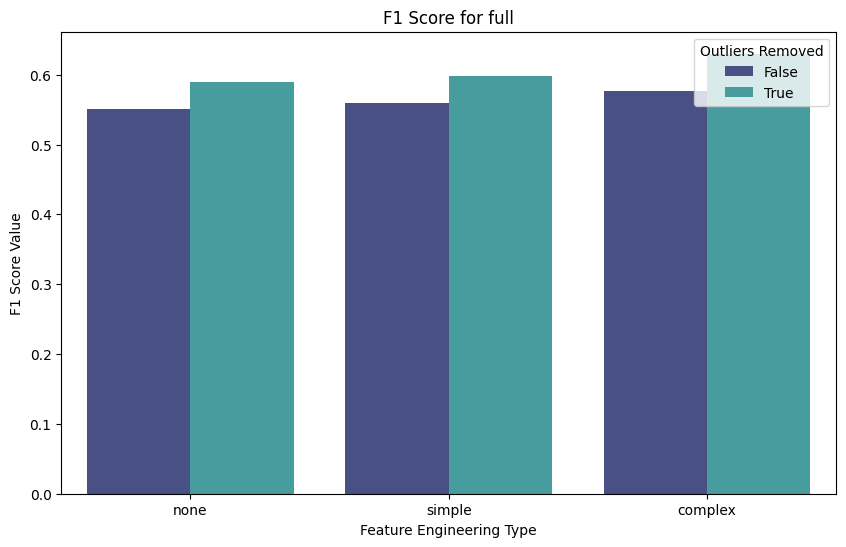

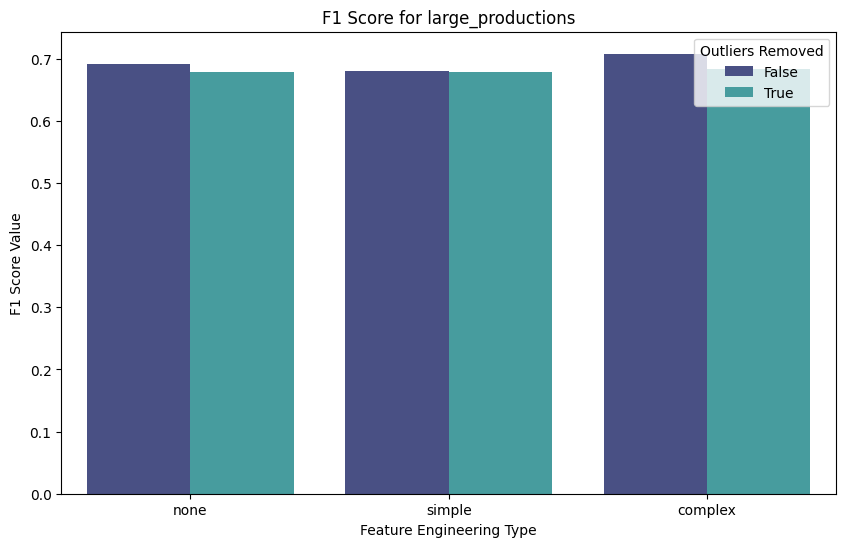

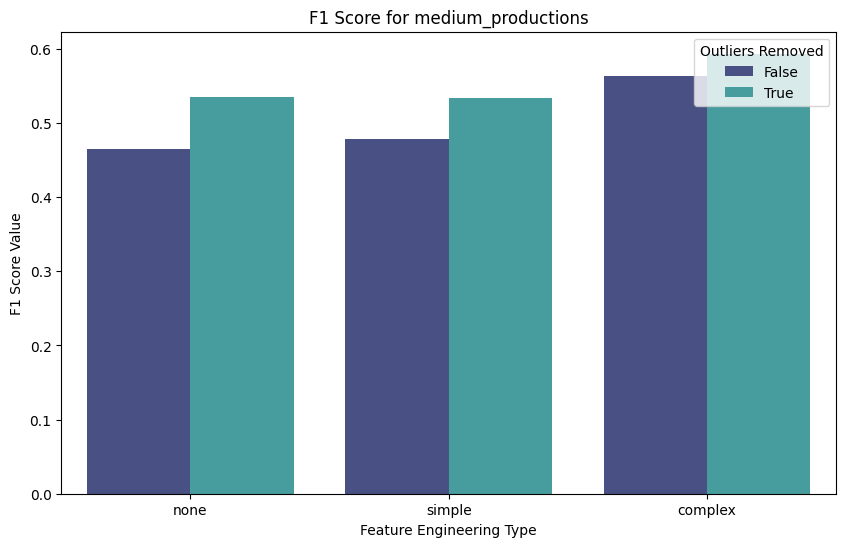

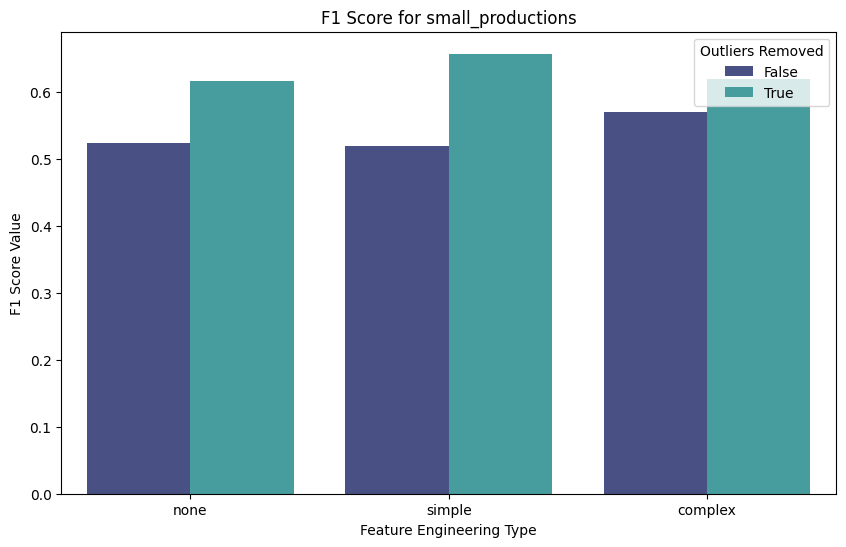

In [7]:
plot_one_metric_of_different_datasets_per_feature_engineering_outliers(experiment_df, problem_type='binary_classification', metric='F1 Score', metric_agg='max')

In [7]:
import plotly.express as px

def plot_one_metric_of_different_datasets_per_feature_engineering_outliers_with_plotly(experiment_df, problem_type='binary_classification', metric='F1 Score', metric_agg='max'):
    # Filter the data frame for the specified problem type
    experiment_df = experiment_df[experiment_df['problem_type'] == problem_type]

    # Define custom orders for plotting
    feature_engineering_order = ['none', 'simple', 'complex']
    has_outliers_removed_order = [False, True]  # Plotly handles boolean as strings in legends

    # Group the data by dataset name, outliers removed, and feature engineering
    grouped_data = experiment_df.groupby(['dataset_name', 'has_outliers_removed', 'feature_engineering']).agg({
        metric: metric_agg
    }).reset_index()

    # Iterate over each dataset and create a plot
    for dataset_name, data in grouped_data.groupby('dataset_name'):
        fig = px.bar(
            data,
            x='feature_engineering',
            y=metric,
            color='has_outliers_removed',
            text=metric,  # This places the text on the bars
            category_orders={
                'feature_engineering': feature_engineering_order,
                'has_outliers_removed': has_outliers_removed_order
            },
            title=f'{metric} for {dataset_name}',
            labels={
                'feature_engineering': 'Feature Engineering Type',
                'has_outliers_removed': 'Outliers Removed',
                metric: f'{metric} Value'
            },
            color_discrete_sequence=px.colors.qualitative.Set2,  # Custom color palette
            barmode = 'group'
        )

        # Update layout for a cleaner look
        fig.update_traces(texttemplate='%{text:.2s}', textposition='inside')
        fig.update_layout(
            showlegend=True,
            legend_title_text='Outliers Removed'
        )

        fig.show()


In [10]:
plot_one_metric_of_different_datasets_per_feature_engineering_outliers_with_plotly(experiment_df, problem_type='binary_classification', metric='F1 Score', metric_agg='max')


In [9]:
plot_one_metric_of_different_datasets_per_feature_engineering_outliers_with_plotly(experiment_df, problem_type='multi_class_classification', metric='F1 Score', metric_agg='max')

In [11]:
plot_one_metric_of_different_datasets_per_feature_engineering_outliers_with_plotly(experiment_df, problem_type='regression', metric='MAPE', metric_agg='min')